In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# 打印当前目录下的文件
for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./deepseekr1-finetuning-ipynb.ipynb
./playground.json
./refe link.txt
./DeepSeekR1_GoogleGeminiPro_RAG_Streamlit-main\deepseekgoogle_rag.py
./DeepSeekR1_GoogleGeminiPro_RAG_Streamlit-main\deepseekv3-finetuning-ipynb (1).ipynb
./DeepSeekR1_GoogleGeminiPro_RAG_Streamlit-main\deepseekvsgemini.py
./DeepSeekR1_GoogleGeminiPro_RAG_Streamlit-main\README.md
./llama.cpp\.git\config
./llama.cpp\.git\description
./llama.cpp\.git\HEAD
./llama.cpp\.git\hooks\applypatch-msg.sample
./llama.cpp\.git\hooks\commit-msg.sample
./llama.cpp\.git\hooks\fsmonitor-watchman.sample
./llama.cpp\.git\hooks\post-update.sample
./llama.cpp\.git\hooks\pre-applypatch.sample
./llama.cpp\.git\hooks\pre-commit.sample
./llama.cpp\.git\hooks\pre-merge-commit.sample
./llama.cpp\.git\hooks\pre-push.sample
./llama.cpp\.git\hooks\pre-rebase.sample
./llama.cpp\.git\hooks\pre-receive.sample
./llama.cpp\.git\hooks\prepare-commit-msg.sample
./llama.cpp\.git\hooks\push-to-checkout.sample
./llama.cpp\.git\hooks\sendemail-validate.sam

# DeepSeek R1 Model Fine-Tuning (LORA) with GPT-4 Dataset [Unsloth and OLLAMA]

## **Unsloth**

高效微调llm的框架，支持LoRA，fast LoRA  
Unsloth appears to be a tool or framework designed for efficient fine-tuning of language models. From the context, it likely incorporates techniques like Low-Rank Adaptation (LoRA) and other efficiency optimizations to fine-tune large models, such as Llama derivatives, with minimal computational resources.

The key features of Unsloth as implied by your description might include:

1. **Efficient Fine-Tuning**: Instead of updating the entire model's weights, it leverages methods like LoRA, which fine-tune a smaller subset of the parameters, making it resource-efficient.

2. **Simplified Workflow**: The process of loading models, configuring parameters, and training appears streamlined, allowing developers to focus on specific customizations rather than managing complex infrastructure.

3. **Integration with Local Runtimes**: After fine-tuning, exporting to tools like Ollama for local deployment demonstrates its support for practical application.

## **DeepSeek-R1**

llm  
The DeepSeek-R1 is a versatile robot for exploration and inspection in tough environments. With AI, precise sensors, and multi-terrain mobility, it handles tasks like data collection, mapping, and monitoring. Customisable for search and rescue, inspections, or research, it ensures reliable performance in hazardous areas.


In [29]:
# !pip install unsloth

#  WARNING: The script shtab.exe is installed in 'C:\Users\Emma2\AppData\Roaming\Python\Python312\Scripts' which is not on PATH.
#   Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
#   WARNING: The script diffusers-cli.exe is installed in 'C:\Users\Emma2\AppData\Roaming\Python\Python312\Scripts' which is not on PATH.
#   Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
#   WARNING: The script datasets-cli.exe is installed in 'C:\Users\Emma2\AppData\Roaming\Python\Python312\Scripts' which is not on PATH.
#   Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
#   WARNING: The script trl.exe is installed in 'C:\Users\Emma2\AppData\Roaming\Python\Python312\Scripts' which is not on PATH.
#   Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

In [30]:
# !pip uninstall unsloth -y && pip install --upgrade --no-cache-dir --no-deps git+https://github.com/unslothai/unsloth.git

## Load the Model
用unsloth加载模型、分词器  
Using Unsloth, you load the DeepSeek-R1 Distilled Llama-8B model, a smaller, faster version of the Llama model optimised for performance while retaining accuracy.
Along with the model, you also load its tokeniser. The tokeniser breaks down input text into smaller units (tokens) that the model can process.AttributeError

## Importance? 
Loading the model and tokenizer is the foundation for fine-tuning since they define how text inputs are processed and predictions are generated.

In [31]:
from unsloth import FastLanguageModel
import torch

# os.environ["HF_HUB_ENABLE_HF_TRANSFER"
# ] = "0"  # 禁用hf_transfer加速下载

model, tokenizer = FastLanguageModel.from_pretrained(
    # model_name = "unsloth/DeepSeek-R1-Distill-Llama-8B-unsloth-bnb-4bit",  #自定义选用的llm，默认从huggingface下载
    model_name = "unsloth/deepseek-r1-distill-qwen-1.5b-unsloth-bnb-4bit",
    max_seq_length = 10240,  #？更长点？2048, 32768
    dtype = None,   #模型权重的数值精度，none为自动
    load_in_4bit = True,  #以4bit精度微调
)
# 下载cpp环境以支持unsloth包

==((====))==  Unsloth 2025.3.14: Fast Qwen2 patching. Transformers: 4.49.0. vLLM: 0.7.4.dev414+g01b3fd0a.
   \\   /|    NVIDIA GeForce RTX 4060 Laptop GPU. Num GPUs = 1. Max memory: 7.996 GB. Platform: Windows.
O^O/ \_/ \    Torch: 2.6.0+cu126. CUDA: 8.9. CUDA Toolkit: 12.6. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


In [32]:
# 查看模型结构
# 方法 1: 直接打印模型
print("Model structure:")
print(model)

# 方法 2: 查看参数名称和形状
print("\nParameters:")
for name, param in model.named_parameters():
    print(f"Parameter name: {name}, Shape: {param.shape}")

Model structure:
Qwen2ForCausalLM(
  (model): Qwen2Model(
    (embed_tokens): Embedding(151936, 1536, padding_idx=151654)
    (layers): ModuleList(
      (0): Qwen2DecoderLayer(
        (self_attn): Qwen2Attention(
          (q_proj): Linear(in_features=1536, out_features=1536, bias=True)
          (k_proj): Linear(in_features=1536, out_features=256, bias=True)
          (v_proj): Linear(in_features=1536, out_features=256, bias=True)
          (o_proj): Linear(in_features=1536, out_features=1536, bias=False)
          (rotary_emb): LlamaRotaryEmbedding()
        )
        (mlp): Qwen2MLP(
          (gate_proj): Linear4bit(in_features=1536, out_features=8960, bias=False)
          (up_proj): Linear4bit(in_features=1536, out_features=8960, bias=False)
          (down_proj): Linear4bit(in_features=8960, out_features=1536, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): Qwen2RMSNorm((1536,), eps=1e-06)
        (post_attention_layernorm): Qwen2RMSNorm((1536,), ep

## Setup Parameter-Efficient Fine-Tuning (PEFT) 
The **FastLanguageModel.get_peft_model** function modifies a pre-trained language model to use PEFT techniques, which allow fine-tuning of the model using fewer resources and parameters.

The method introduces additional tunable parameters (like LoRA matrices) to specific layers of the model while freezing most of the original model weights.

PEFT包支持的微调方法：  
LoRA（Low-Rank Adaptation）：通过引入低秩矩阵来微调模型权重，仅需训练少量参数即可达到与全参数微调相当的性能。（LORA冻结预训练模型的权重，仅在每个Transformer层+中注入可训练的低秩分解矩阵+，大大减少了下游任务的可训练参数数量。）   
Prefix Tuning：通过优化输入提示（prompt）来调整模型，不改变模型权重，适应性强。  
Prompt Tuning：通过优化连续提示来微调模型，适用于零样本和少样本学习。  
BitFit：仅对模型的偏置项进行微调，极大地减少了需要优化的参数数量。  
QLoRA: 使用4位量化和低秩适配器，结合双量化和分页优化器。  
等等...  
https://huggingface.co/docs/peft/index   


***In this Project, we use LORA to fine-tune the DeepSeek R1 LLM.***

First, it takes the existing model. Then, it applies a technique called PEFT (Parameter-Efficient Fine-Tuning).  Think of it as adding small, adjustable "knobs" instead of changing the whole engine.

r=4 and lora_alpha=16 are just settings for how many "knobs" and how sensitive they are.  target_modules specifies where these knobs are attached – specifically, parts of the model that handle questions, keys, values, and outputs.  lora_dropout=0 means no "knobs" are randomly turned off during training.

bias="none" means no extra adjustments to the model's biases. use_gradient_checkpointing="unsloth" is a memory-saving trick for training. random_state=42 ensures we get the same results if we run this again.  use_rslora=False and loftq_config=None are more advanced settings that are turned off here.  

调整强度 = alpha / r  

In [33]:
model = FastLanguageModel.get_peft_model(
    model,
    r = 4,   #指定低秩矩阵的秩（rank），r越小，参数量越小，矩阵分解，[原始维度, r] 和 [r, 原始维度]
    target_modules = ["q_proj", "k_proj", "v_proj", "o_proj"],
    lora_alpha = 16,
    lora_dropout = 0,
    bias = "none",
    use_gradient_checkpointing = "unsloth",
    random_state = 333,  #seed实验时保持相同
    use_rslora = False,
    loftq_config = None,
)

In [34]:
# 查看模型结构
# 方法 1: 直接打印模型
print("Model structure:")
print(model)

# 方法 2: 查看参数名称和形状
print("\nParameters:")
for name, param in model.named_parameters():
    print(f"Parameter name: {name}, Shape: {param.shape}")

Model structure:
PeftModelForCausalLM(
  (base_model): LoraModel(
    (model): Qwen2ForCausalLM(
      (model): Qwen2Model(
        (embed_tokens): Embedding(151936, 1536, padding_idx=151654)
        (layers): ModuleList(
          (0): Qwen2DecoderLayer(
            (self_attn): Qwen2Attention(
              (q_proj): lora.Linear(
                (base_layer): Linear(in_features=1536, out_features=1536, bias=True)
                (lora_dropout): ModuleDict(
                  (default): Identity()
                )
                (lora_A): ModuleDict(
                  (default): Linear(in_features=1536, out_features=4, bias=False)
                )
                (lora_B): ModuleDict(
                  (default): Linear(in_features=4, out_features=1536, bias=False)
                )
                (lora_embedding_A): ParameterDict()
                (lora_embedding_B): ParameterDict()
                (lora_magnitude_vector): ModuleDict()
              )
              (k_proj): lora.

## Load Dataset

数据集：vicgalle/alpaca-gpt4  
https://huggingface.co/datasets/vicgalle/alpaca-gpt4  
The vicgalle/alpaca-gpt4 dataset is a collection of 52,000 instruction-following instances designed to fine-tune language models (LLMs). It was created by Vic Galie and is available on Hugging Face.  
包含GPT-4使用与Alpaca相同的提示生成的52K指令数据，该数据集的格式与Alpaca数据相同，但输出由GPT-4生成。  

In [35]:
from datasets import load_dataset
dataset = load_dataset("vicgalle/alpaca-gpt4", split = "train")
print(dataset.column_names)

['instruction', 'input', 'output', 'text']


In [36]:
print(dataset)
dataset[29689]

Dataset({
    features: ['instruction', 'input', 'output', 'text'],
    num_rows: 52002
})


{'instruction': 'List the chemical elements that have an atomic number of 30',
 'input': '',
 'output': 'The chemical element that has an atomic number of 30 is Zinc (Zn). Atomic number refers to the number of protons in the nucleus of an atom, and since each element has a unique number of protons, there is only one element that has an atomic number of 30.',
 'text': 'Below is an instruction that describes a task. Write a response that appropriately completes the request.\n\n### Instruction:\nList the chemical elements that have an atomic number of 30\n\n### Response:\nThe chemical element that has an atomic number of 30 is Zinc (Zn). Atomic number refers to the number of protons in the nucleus of an atom, and since each element has a unique number of protons, there is only one element that has an atomic number of 30.'}

Let's format the dataset in a way suitable for conversational AI training using the ShareGPT format, which is designed for multi-turn conversations.

In [37]:
from unsloth import to_sharegpt

dataset = to_sharegpt(
    dataset,
    merged_prompt = "{instruction}[[\nYour input is:\n{input}]]",   #合并instruction指令和input输入
    output_column_name = "output",
    conversation_extension = 3, # Select more to handle longer conversations（控制对话的历史拓展轮次？）
)

In [38]:
print(dataset)
dataset[29648]

Dataset({
    features: ['conversations'],
    num_rows: 52002
})


{'conversations': [{'from': 'human',
   'value': 'Come up with a tagline for a new snack food.'},
  {'from': 'gpt',
   'value': '"Indulge in the goodness - Happy snacking with every bite!"'},
  {'from': 'human',
   'value': 'What is an example of something that does not require input parameters?'},
  {'from': 'gpt',
   'value': "One example of something that doesn't require input parameters is calling the current date or time from the system's clock, using functions such as `time.time()` in Python's `time` module or `Date.now()` in JavaScript's `Date` object. These functions do not require any arguments to be passed and they simply return the current date and time."},
  {'from': 'human', 'value': 'Create a new art style.'},
  {'from': 'gpt',
   'value': 'Introducing the new art style: "Transfusionism"\n\nTransfusionism is an art style that blends elements from different eras, cultures, and mediums to create a unique and harmonious fusion. This style focuses on the use of vibrant colors

In [39]:
from unsloth import standardize_sharegpt
dataset = standardize_sharegpt(dataset)

In [40]:
print(dataset)
print(dataset[2])
dataset[2]['conversations']

Dataset({
    features: ['conversations'],
    num_rows: 52002
})
{'conversations': [{'content': 'Describe the structure of an atom.', 'role': 'user'}, {'content': "An atom is the basic building block of all matter and is made up of three types of particles: protons, neutrons, and electrons. The structure of an atom can be described as a nucleus at the center surrounded by a cloud of electrons.\n\nThe nucleus of an atom is made up of protons and neutrons. Protons are positively charged particles and neutrons are neutral particles with no charge. Both of these particles are located in the nucleus of the atom, which is at the center of the atom and contains most of the atom's mass.\n\nSurrounding the nucleus of the atom is a cloud of electrons. Electrons are negatively charged particles that are in constant motion around the nucleus. The electron cloud is divided into shells or orbitals, and each shell can hold a certain number of electrons. The number of electrons in the outermost shell

[{'content': 'Describe the structure of an atom.', 'role': 'user'},
 {'content': "An atom is the basic building block of all matter and is made up of three types of particles: protons, neutrons, and electrons. The structure of an atom can be described as a nucleus at the center surrounded by a cloud of electrons.\n\nThe nucleus of an atom is made up of protons and neutrons. Protons are positively charged particles and neutrons are neutral particles with no charge. Both of these particles are located in the nucleus of the atom, which is at the center of the atom and contains most of the atom's mass.\n\nSurrounding the nucleus of the atom is a cloud of electrons. Electrons are negatively charged particles that are in constant motion around the nucleus. The electron cloud is divided into shells or orbitals, and each shell can hold a certain number of electrons. The number of electrons in the outermost shell, called the valence shell, determines the chemical properties of the atom. \n\nIn 

## Customizable Chat Templates

This code takes a dataset, formats it into a chat-friendly format, and then applies a template so that the AI can understand the instructions and responses correctly.  
设置对话模板  

In [41]:
chat_template = """Below are some instructions that describe some tasks. Write responses that appropriately complete each request.

### Instruction:
{INPUT}

### Response:
{OUTPUT}"""

from unsloth import apply_chat_template
dataset = apply_chat_template(
    dataset,
    tokenizer = tokenizer,
    chat_template = chat_template,
    # default_system_message = "You are a helpful assistant", << [OPTIONAL]
)

# 这里没用上？

Unsloth: We automatically added an EOS token to stop endless generations.


## Train the model

Let's define and configure a fine-tuning trainer for a language model using the **SFTTrainer** class from the **trl** library (likely for fine-tuning language models) and transformers' **TrainingArguments**  
(trl, transformers)  

It uses SFTTrainer from the trl library, which is specifically for Supervised Fine-Tuning.  This means the model will learn from the dataset of instructions and responses you prepared earlier.

It takes the model (the tuned language model), the tokenizer (for breaking down text), and the dataset. 模型、分词器、数据集。 dataset_text_field="text" 文本在数据集中大位置 tells it where the actual text is in the dataset.  max_seq_length=2048 （最大序列长度：模型能够处理的最长输入序列的长度，超过此长度的序列将被截断或分块处理。） limits the length of text sequences the model processes at once. dataset_num_proc=2 用于准备数据的进程数量 uses two processes to prepare the data, and packing=False 是否使用打包技术 disables a specific data packing technique.

Then, it configures the training process with TrainingArguments.  per_device_train_batch_size=2 means each training device (like a GPU) will process 2 examples at a time. gradient_accumulation_steps=4 combines the gradients from 4 batches to simulate a larger batch size. warmup_steps=5 gradually increases the learning rate at the beginning. max_steps=20 limits the total training steps. learning_rate=2e-4 sets the learning rate.  fp16 and bf16 control the precision of calculations (using either half-precision or bfloat16 if supported, for faster training). logging_steps=1 logs training progress every step. optim="adamw_8bit" specifies the optimizer. weight_decay=0.01 is a regularization technique. lr_scheduler_type="linear" sets how the learning rate changes over time. seed=3407 ensures reproducibility. output_dir="outputs" specifies where to save the trained model. report_to="none" disables reporting to services like WandB (Weights & Biases).


In [43]:
from trl import SFTTrainer
from transformers import TrainingArguments
from unsloth import is_bfloat16_supported

trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    train_dataset = dataset,
    dataset_text_field = "text",
    max_seq_length = 2048,    #2048，10240
    dataset_num_proc = 1,   #1，2，... 用于准备数据的进程数量
    packing = False,
    args = TrainingArguments(
        per_device_train_batch_size = 6,  # batch size，2,4, 每次前向/反向传播时处理的样本数量
        gradient_accumulation_steps = 4,  # 梯度累积步数（有效批次大小=2*4=8）
        warmup_steps = 5,                 # 学习率预热步数（初期逐步增加学习率）
        # num_train_epochs =1,              # epoch完整遍历整个训练集的次数，epoch = 总样本数 / (batch_size * gradient_accumulation_steps) (可不加epoch变量)
        max_steps = 50,                   # 最大训练步数（此处20仅为示例，实际需更大; -1意为跟着epoch数量计算）
        learning_rate = 2e-4,             # 初始学习率（常用值，可调整）
        fp16 = not is_bfloat16_supported(), # 启用FP16混合精度（若不支持BF16）
        bf16 = is_bfloat16_supported(),   # 优先使用BF16（兼容性更好，若GPU支持）
        logging_steps = 1,                # 每1步记录日志（调试时可高频，生产环境可调低）
        optim = "adamw_8bit",             # 使用8-bit AdamW优化器（节省显存，需安装bitsandbytes）
        weight_decay = 0.01,              # 权重衰减（防过拟合）
        lr_scheduler_type = "linear",     # 学习率调度策略（线性衰减至零）
        seed = 3407,                      # 随机种子（确保实验可复现）
        output_dir = "outputs",           # 模型和日志输出目录
        report_to = "none",               # Use this for WandB etc, none禁用第三方报告（如WandB，需时改为"wandb"）
    ),
)

Unsloth: We found double BOS tokens - we shall remove one automatically.


The trainer orchestrates the fine-tuning process by combining the model, tokenizer, dataset, and hyperparameters. It ensures efficient training, taking advantage of mixed precision (fp16 or bf16) and memory-efficient optimizations (e.g., AdamW with 8-bit precision). Additionally, it handles sequence preprocessing, gradient accumulation, and learning rate scheduling.  

eg:  
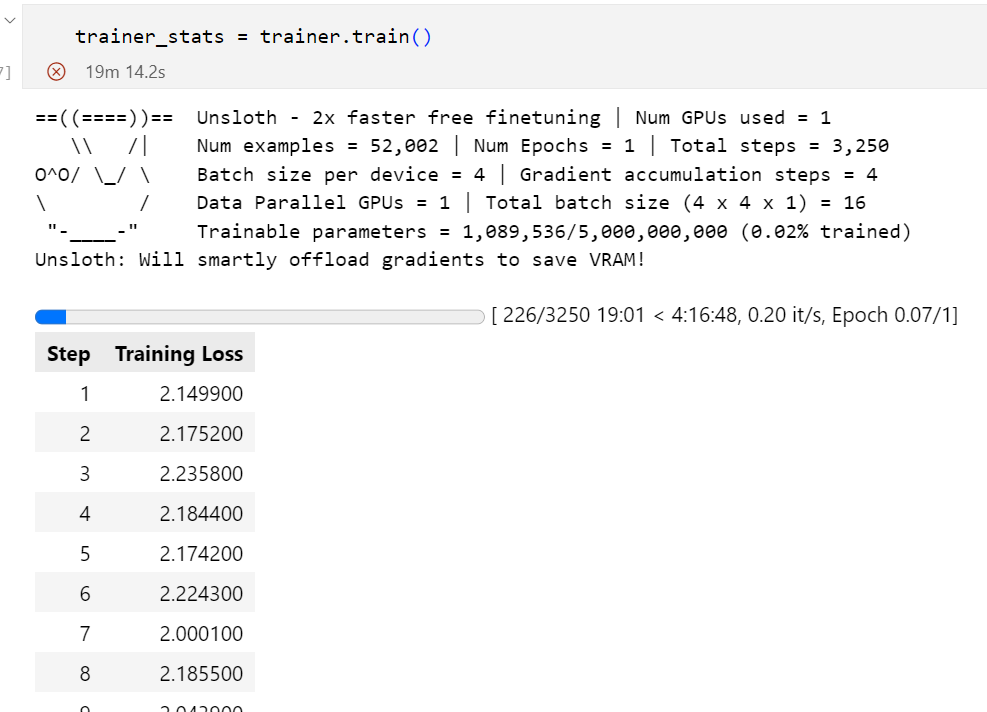  


In [44]:
trainer_stats = trainer.train()

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 52,002 | Num Epochs = 1 | Total steps = 50
O^O/ \_/ \    Batch size per device = 6 | Gradient accumulation steps = 4
\        /    Data Parallel GPUs = 1 | Total batch size (6 x 4 x 1) = 24
 "-____-"     Trainable parameters = 1,089,536/5,000,000,000 (0.02% trained)


Step,Training Loss
1,2.142200
2,2.239400
3,2.219700
4,2.189800
5,2.119500
6,2.163400
7,2.032600
8,1.936900
9,1.979700
10,2.044000


save the model

In [50]:
# 保存完整模型（结构+权重）和分词器 （pytorch原生格式）
model.save_pretrained("outputs/pytorch_model")
tokenizer.save_pretrained("outputs/pytorch_model")

('outputs/pytorch_model\\tokenizer_config.json',
 'outputs/pytorch_model\\special_tokens_map.json',
 'outputs/pytorch_model\\tokenizer.json')

In [52]:
# 需提前登录：huggingface-cli login
model.push_to_hub("scdow/deepseek-r1-distill-qwen-1.5b-unsloth-bnb-4bit-vicgalle-alpaca-gpt")
tokenizer.push_to_hub("scdow/deepseek-r1-distill-qwen-1.5b-unsloth-bnb-4bit-vicgalle-alpaca-gpt")

HfHubHTTPError: 401 Client Error: Unauthorized for url: https://huggingface.co/api/repos/create (Request ID: Root=1-67d9b64a-528fa7e41fcffba160b613b8;a6821da6-ffea-4101-80dc-b05a45478ef5)

Invalid username or password.

In [45]:
model.save_pretrained_gguf("model", tokenizer)
model.save()

Unsloth: ##### The current model auto adds a BOS token.
Unsloth: ##### Your chat template has a BOS token. We shall remove it temporarily.


Unsloth: Merging 4bit and LoRA weights to 16bit...
Unsloth: Will use up to 0.0 out of 15.78 RAM for saving.
Unsloth: Saving model... This might take 5 minutes ...


100%|██████████| 28/28 [00:00<00:00, 93.73it/s]


Unsloth: Saving tokenizer... Done.
Done.
==((====))==  Unsloth: Conversion from QLoRA to GGUF information
   \\   /|    [0] Installing llama.cpp might take 3 minutes.
O^O/ \_/ \    [1] Converting HF to GGUF 16bits might take 3 minutes.
\        /    [2] Converting GGUF 16bits to ['q8_0'] might take 10 minutes each.
 "-____-"     In total, you will have to wait at least 16 minutes.

Unsloth: Installing llama.cpp. This might take 3 minutes...


RuntimeError: Unsloth: The file ('llama.cpp/llama-quantize' or 'llama.cpp/llama-quantize.exe' if you are on Windows WSL) or 'llama.cpp/quantize' does not exist.
But we expect this file to exist! Maybe the llama.cpp developers changed the name or check extension of the llama-quantize file.

In [ ]:
# 使用微调过的模型
from IPython.display import Markdown
import ollama

response = ollama.chat(model="deepseek_finetuned_model",
                       messages=[{"role": "user",
                                  "content": "How to add chart to a document?"},
                      ])

Markdown(response.message.content)

## Ollama

OLAMA is a powerful tool that enables you to run large language models (LLMs) directly on your own computer (laptop or desktop).


In [ ]:
# !curl -fsSL https://ollama.com/install.sh | sh

>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
############################################################################################# 100.0%##                                                                                     11.3%############################                                                         41.9%###################################                                               52.2%1.4%####################################################################             88.3%#########################################################################        94.0%
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.


Let's save this model.

In [ ]:
# model.save_pretrained_gguf("model", tokenizer)

Unsloth: ##### The current model auto adds a BOS token.
Unsloth: ##### Your chat template has a BOS token. We shall remove it temporarily.


Cloning into 'llama.cpp'...
Submodule 'kompute' (https://github.com/nomic-ai/kompute.git) registered for path 'ggml/src/ggml-kompute/kompute'
Cloning into '/kaggle/working/llama.cpp/ggml/src/ggml-kompute/kompute'...
Submodule path 'ggml/src/ggml-kompute/kompute': checked out '4565194ed7c32d1d2efa32ceab4d3c6cae006306'
make: Entering directory '/kaggle/working/llama.cpp'
-- The C compiler identification is GNU 11.4.0
-- The CXX compiler identification is GNU 11.4.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Found Git: /usr/bin/git (found version "2.34.1")
-- Performing Test CMAKE_HAVE_LIBC_PTHREAD
-- Performing Test CMAKE_HAV

Unsloth: You have 2 CPUs. Using `safe_serialization` is 10x slower.
We shall switch to Pytorch saving, which might take 3 minutes and not 30 minutes.
To force `safe_serialization`, set it to `None` instead.
Unsloth: Kaggle/Colab has limited disk space. We need to delete the downloaded
model which will save 4-16GB of disk space, allowing you to save on Kaggle/Colab.
Unsloth: Will remove a cached repo with size 6.0G


Unsloth: Merging 4bit and LoRA weights to 16bit...
Unsloth: Will use up to 21.16 out of 31.35 RAM for saving.
Unsloth: Saving model... This might take 5 minutes ...


 44%|████▍     | 14/32 [00:00<00:00, 32.79it/s]
We will save to Disk and not RAM now.
100%|██████████| 32/32 [00:15<00:00,  2.06it/s]


Unsloth: Saving tokenizer... Done.
Unsloth: Saving model/pytorch_model-00001-of-00004.bin...
Unsloth: Saving model/pytorch_model-00002-of-00004.bin...
Unsloth: Saving model/pytorch_model-00003-of-00004.bin...
Unsloth: Saving model/pytorch_model-00004-of-00004.bin...
Done.


Unsloth: Converting llama model. Can use fast conversion = False.


==((====))==  Unsloth: Conversion from QLoRA to GGUF information
   \\   /|    [0] Installing llama.cpp might take 3 minutes.
O^O/ \_/ \    [1] Converting HF to GGUF 16bits might take 3 minutes.
\        /    [2] Converting GGUF 16bits to ['q8_0'] might take 10 minutes each.
 "-____-"     In total, you will have to wait at least 16 minutes.

Unsloth: Installing llama.cpp. This might take 3 minutes...
Unsloth: [1] Converting model at model into q8_0 GGUF format.
The output location will be /kaggle/working/model/unsloth.Q8_0.gguf
This might take 3 minutes...
2025-01-28 20:27:27.181333: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-28 20:27:27.208793: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-28 20:27

OSError: [Errno 28] No space left on device

# Start the OLLAMA Server

In [ ]:
import subprocess
subprocess.Popen(["ollama", "serve"])
import time
time.sleep(3)
print(tokenizer._ollama_modelfile)

This command registers the fine-tuned model (deepseek_finetuned_model) with Ollama. Once registered:

- The model can be run locally using Ollama.
- It becomes accessible for further tasks, such as querying, evaluating, or deploying in specific applications.
- Ollama ensures the model is formatted and stored correctly for efficient usage

In [ ]:
!ollama create deepseek_finetuned_model -f ./model/Modelfile

In [ ]:
!pip install ollama

In [ ]:
import ollama

response = ollama.chat(model="deepseek_finetuned_model",
            messages=[{ "role": "user", "content": "Continue the Fibonacci sequence: 1, 1, 2, 3, 5, 8,"
            },
                      ])

print(response.message.content)

1, 1, 2, 3, 5, 8, 13, 21

In [ ]:
from IPython.display import Markdown
import ollama

response = ollama.chat(model="deepseek_finetuned_model",
                       messages=[{"role": "user",
                                  "content": "How to add chart to a document?"},
                      ])

Markdown(response.message.content)

To add a chart to a document, follow these steps:

- Insert a Table: Start by inserting a table into the document. You can do this using the 'Table' tool in most word processors.
- Insert Data: Add data into the table. Ensure that your data is properly formatted and organised before adding the chart.
- Choose a Chart Type: Select the type of chart you want to create from the available options (e.g., bar chart, pie chart, line graph, etc.).
- Edit the Chart Data: Add the necessary data points and formatting to the chart using the chart editor that appears once the chart is selected.
- Format the Table and Chart Together: Make sure the table and chart work well together by adjusting alignment, spacing, and other design elements as needed.

For more detailed instructions, you may want to consult a guide or use a tool such as Microsoft Word's chart features.